In [317]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [318]:
small_ds= "file.csv"
large_ds= "gwas.csv"

In [319]:
df = pd.read_csv(small_ds)
df.head()

,main1,main2,main3,main4,main5,main6,main7,main8,main9,main10,...,var17,var18,var19,var20,var21,var22,var23,var24,var25,classes
0,0,1,1,1,2,1,1,0,0,0,...,1,2,0,0,0,1,0,0,0,1
1,0,0,0,1,1,0,0,0,1,1,...,0,0,1,2,0,0,2,0,0,1
2,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,2,2,0,0,1,1
3,0,1,0,0,1,0,1,2,1,1,...,1,0,1,0,1,1,0,1,1,1
4,0,0,1,2,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1


In [320]:
def plotScore(x,y, selected_features):
    df=pd.DataFrame({'features':x, 'score':y})
    plt.figure(figsize=(12,6))
    sns.barplot(df, x='features', y='score', hue='score')
    sns.barplot(x=x, y=selected_features, hue=selected_features)
    plt.xticks(rotation=45)
    plt.figure(figsize=(12,6))
    sns.scatterplot(df, x='features', y='score', hue='score')
    plt.xticks(rotation=45)
    plt.show()

<Axes: >

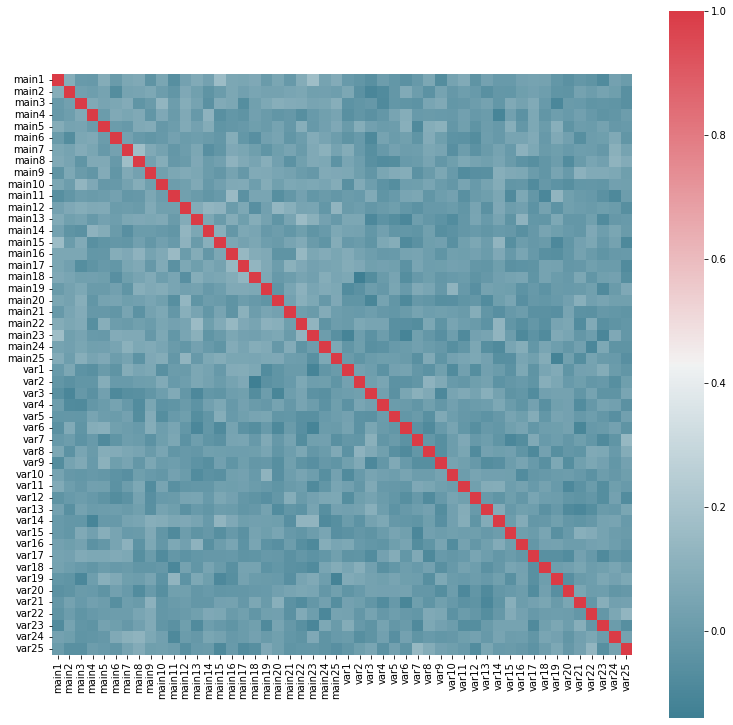

In [321]:
f, ax = plt.subplots(figsize=(13, 13))
corr = df.iloc[:, :-1].corr()
sns.heatmap(corr, mask=np.zeros_like(corr), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

<h1><b>Filter Methods for feature selection</b></h1>

In [322]:
from sklearn.model_selection import train_test_split
X = df.drop('classes', axis=1)
y = df.classes

# X = df.iloc[:, :-1].values
# y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20)
X_train

,main1,main2,main3,main4,main5,main6,main7,main8,main9,main10,...,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25
294,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,1
386,1,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,1,1,1
477,0,0,0,0,0,0,1,0,1,0,...,0,1,1,0,1,0,0,1,0,0
235,0,1,0,1,2,0,1,1,2,0,...,1,0,1,1,0,1,2,1,1,0
177,0,1,0,0,2,0,0,0,0,0,...,1,0,1,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,0,1,1,1,0,0,1,0,0,...,0,2,0,1,1,2,1,0,0,1
225,1,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
454,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
274,0,1,0,0,0,0,0,0,0,1,...,1,1,0,0,0,1,1,1,1,0


In [323]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi_best = SelectKBest(score_func=chi2)
k_best = chi_best.fit(X_train,y_train)

np.set_printoptions(3)
print(k_best.scores_)

k_features = k_best.transform(X_test)
print(k_features[:10])

[1.090e+01 6.938e+00 1.283e+01 1.327e+01 1.486e+01 4.273e+00 1.719e+01
 1.592e+01 9.072e+00 1.590e+01 1.954e+00 1.560e+01 1.719e+01 7.907e+00
 8.569e+00 2.103e+01 1.569e+01 1.241e+01 1.180e+01 1.802e+01 7.159e+00
 1.961e+01 1.037e+01 1.294e+01 2.358e+01 1.756e+00 5.609e-04 1.976e+00
 1.139e+00 8.420e-01 4.380e-03 2.761e-01 1.400e-03 8.972e-02 1.848e-02
 1.256e-02 2.761e-01 9.333e-01 3.168e-01 3.884e-05 2.038e+00 1.159e-01
 3.488e-01 2.475e-02 2.478e-01 8.694e-02 9.918e-01 1.012e-01 1.473e-01
 8.411e-01]
[[0 0 0 1 0 0 0 0 0 1]
 [0 1 1 0 0 1 0 0 0 0]
 [1 1 0 0 1 0 1 1 0 1]
 [0 1 0 0 0 0 1 0 1 1]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 2 1 2 0 2 1]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 2 1 0]
 [0 0 0 1 0 1 0 1 0 1]]


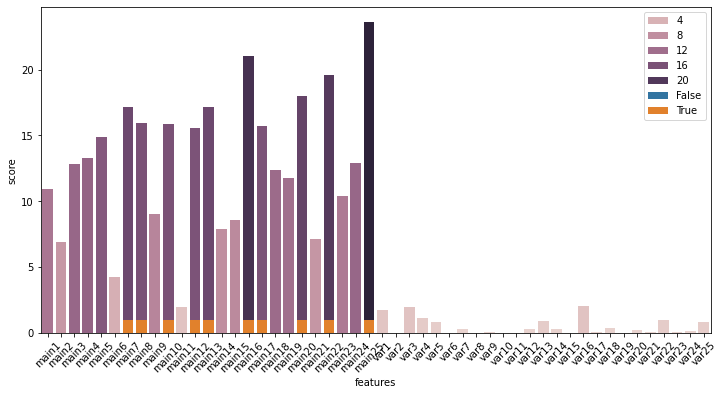

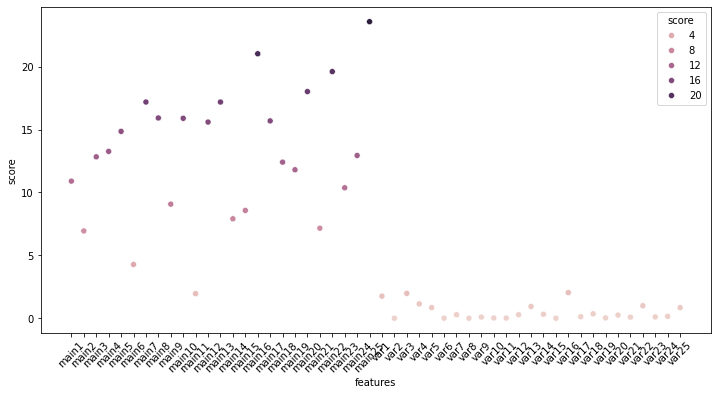

In [324]:
plotScore(k_best.feature_names_in_, k_best.scores_, k_best.get_support())

In [325]:
selected_features_mask = k_best.get_support()
selected_features = X_train.columns[selected_features_mask]
df[selected_features]

,main7,main8,main10,main12,main13,main16,main17,main20,main22,main25
0,1,0,0,1,0,0,0,0,0,1
1,0,0,1,0,0,1,1,0,0,1
2,0,0,0,0,1,1,0,1,2,0
3,1,2,1,0,0,2,2,0,0,0
4,0,0,0,0,0,1,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,1,1,1
496,0,0,1,0,0,0,0,0,0,0
497,0,1,0,0,1,1,0,0,0,0
498,0,0,0,1,0,0,0,0,1,0


<h1><b>Wrapper Methods for feature selection</b></h1>

In [326]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [327]:
lm = LogisticRegression()
rfe = RFE(lm, n_features_to_select=10)
rfe_features = rfe.fit(X_train,y_train)
print("number of features: ",rfe_features.n_features_)
print(rfe_features.support_)
print(rfe_features.ranking_)

number of features:  10
[False False False  True  True False  True False False  True False False
  True False False  True  True False False  True False  True False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False]
[23 12  9  1  1 11  1  5  7  1 17  4  1 13  3  1  1  8 15  1 10  1  6  2
  1 19 28 40 14 27 25 18 20 34 36 21 24 16 26 33 22 30 35 38 39 32 37 41
 29 31]


In [328]:
len(X_train.columns[selected_features_mask])

10

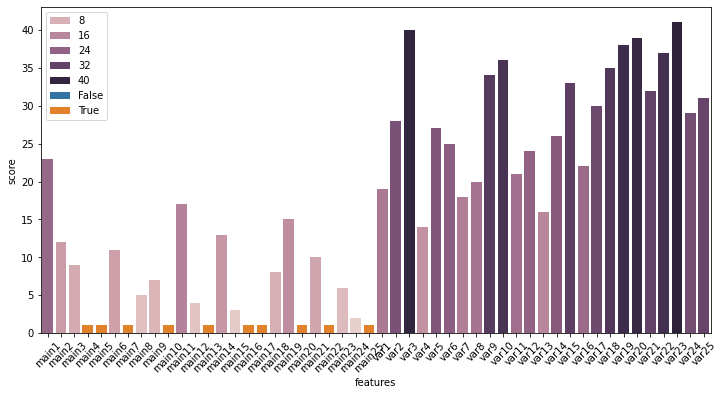

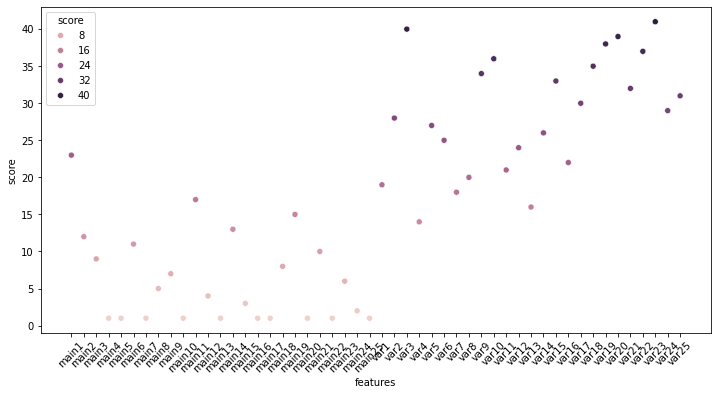

In [329]:
plotScore(rfe_features.feature_names_in_, rfe_features.ranking_, rfe_features.support_)

In [330]:
selected_features = X_train.columns[rfe_features.support_]
df[selected_features]

,main4,main5,main7,main10,main13,main16,main17,main20,main22,main25
0,1,2,1,0,0,0,0,0,0,1
1,1,1,0,1,0,1,1,0,0,1
2,0,0,0,0,1,1,0,1,2,0
3,0,1,1,1,0,2,2,0,0,0
4,2,0,0,0,0,1,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,1,1,1
496,0,0,0,1,0,0,0,0,0,0
497,0,0,0,0,1,1,0,0,0,0
498,0,1,0,0,0,0,0,0,1,0


In [331]:
#pip install xgboost

<h1><b>Embedded Methods for feature selection</b></h1>

In [332]:
from sklearn.linear_model import Ridge

In [333]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train,y_train)

Ridge()

In [334]:
def ceofs(coef, names = None, sort=False):
    if names == None:
        names = ["X%s" % x for x in range(len(coef))]
    lst = zip(coef,names)
    if sort:
        lst = sort(lst, key= lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coefs, 3), name) for coefs,name in lst)

In [335]:
print("Ridge model:", ceofs(ridge_reg.coef_))

Ridge model: 0.022 * X0 + 0.069 * X1 + 0.068 * X2 + 0.136 * X3 + 0.096 * X4 + 0.071 * X5 + 0.111 * X6 + 0.1 * X7 + 0.08 * X8 + 0.103 * X9 + 0.066 * X10 + 0.062 * X11 + 0.09 * X12 + 0.087 * X13 + 0.082 * X14 + 0.077 * X15 + 0.132 * X16 + 0.073 * X17 + 0.087 * X18 + 0.155 * X19 + 0.088 * X20 + 0.123 * X21 + 0.112 * X22 + 0.099 * X23 + 0.12 * X24 + 0.04 * X25 + -0.032 * X26 + 0.012 * X27 + -0.062 * X28 + -0.044 * X29 + 0.027 * X30 + -0.053 * X31 + -0.022 * X32 + -0.015 * X33 + 0.003 * X34 + -0.009 * X35 + -0.012 * X36 + 0.062 * X37 + -0.056 * X38 + -0.015 * X39 + 0.036 * X40 + 0.021 * X41 + 0.027 * X42 + 0.009 * X43 + -0.004 * X44 + 0.006 * X45 + -0.004 * X46 + 0.035 * X47 + -0.032 * X48 + -0.007 * X49


In [336]:
df1 = df.rename(columns={"classes": "target"})

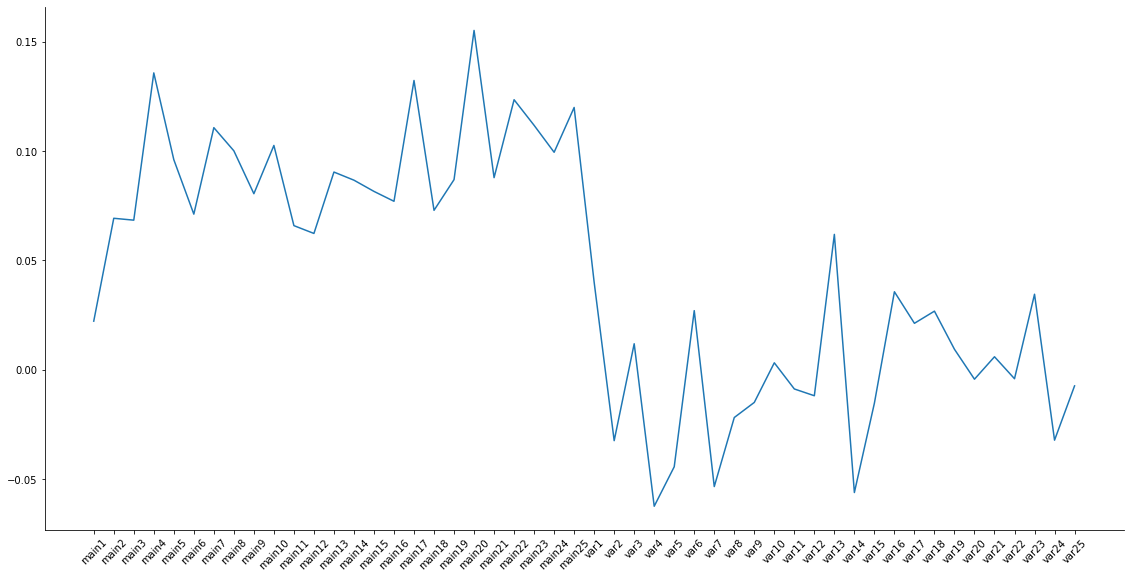

In [337]:
sns.relplot(
    kind="line",
    x=ridge_reg.feature_names_in_,y=ridge_reg.coef_, errorbar=None,height=8,aspect=2
)
plt.xticks(rotation=45)
plt.show()

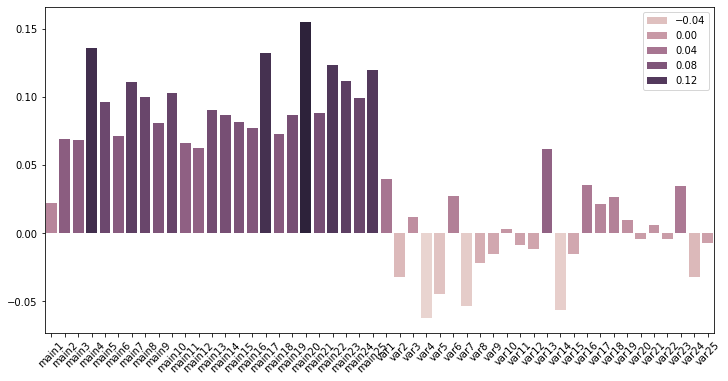

In [338]:

#plotScore(ridge_reg.feature_names_in_,ridge_reg.coef_, ridge_reg.feature_names_in_)
plt.figure(figsize=(12,6))
sns.barplot(x=ridge_reg.feature_names_in_,y=ridge_reg.coef_, hue=ridge_reg.coef_)
plt.xticks(rotation=45)
plt.show()


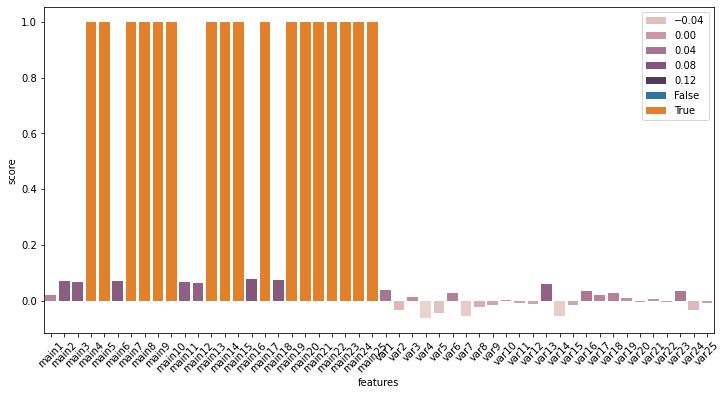

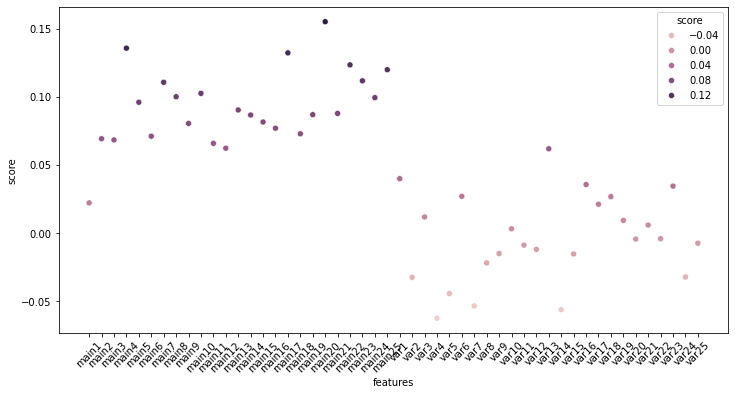

In [339]:
nr = ridge_reg.coef_[ridge_reg.coef_>0]
sel_features = np.array([True if x >= 0.08 else False for x in ridge_reg.coef_])
ridge_reg.feature_names_in_[sel_features]

plotScore(ridge_reg.feature_names_in_,ridge_reg.coef_, sel_features)


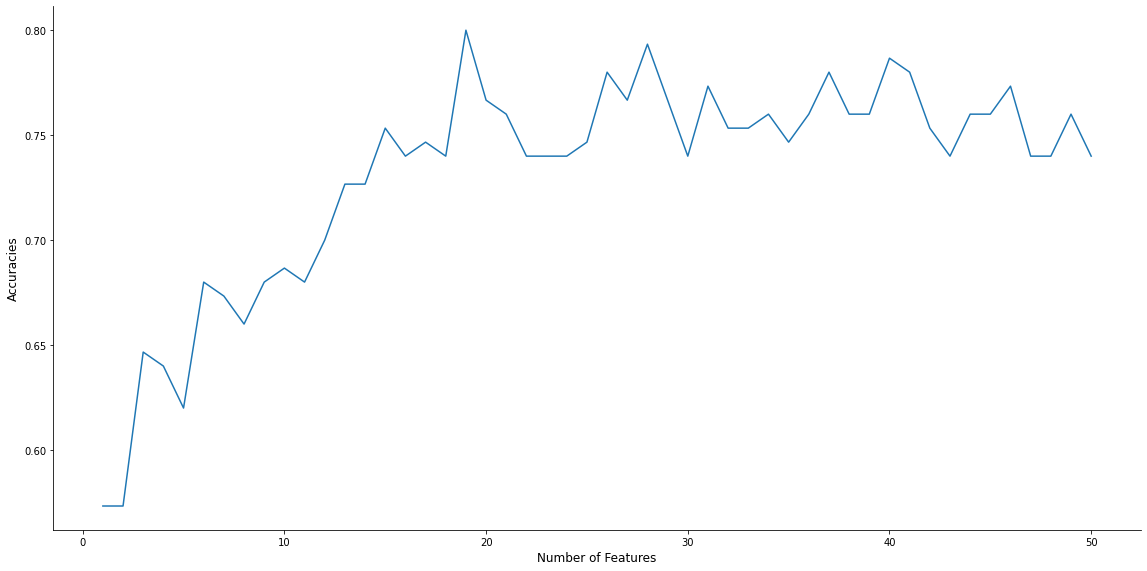

In [340]:

ax = sns.relplot(kind="line", x=num_features, y=accuracies, errorbar="sd", height=8, aspect=2)

plt.xlabel("Number of Features", fontsize=12)
plt.ylabel("Accuracies", fontsize=12)
plt.show()

In [352]:
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

X = df.drop('classes', axis=1)
y = df.classes

# X = df.iloc[:, :-1].values
# y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20)
X_train

# Fit model on all training data
model = XGBClassifier()
model.fit(X_train, y_train)

# Make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
	# Select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
    
	# Train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
    
	# Evalation model
	select_X_test = selection.transform(X_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print ("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], 
                                                    accuracy*100.0))

Accuracy: 77.00%
Thresh=0.005, n=50, Accuracy: 77.00%
Thresh=0.006, n=49, Accuracy: 77.00%
Thresh=0.007, n=48, Accuracy: 78.00%
Thresh=0.008, n=47, Accuracy: 80.00%
Thresh=0.008, n=46, Accuracy: 78.00%
Thresh=0.009, n=45, Accuracy: 80.00%
Thresh=0.009, n=44, Accuracy: 83.00%
Thresh=0.010, n=43, Accuracy: 78.00%
Thresh=0.010, n=42, Accuracy: 78.00%
Thresh=0.010, n=41, Accuracy: 75.00%
Thresh=0.011, n=40, Accuracy: 80.00%
Thresh=0.011, n=39, Accuracy: 78.00%
Thresh=0.012, n=38, Accuracy: 79.00%
Thresh=0.012, n=37, Accuracy: 78.00%
Thresh=0.012, n=36, Accuracy: 83.00%
Thresh=0.013, n=35, Accuracy: 75.00%
Thresh=0.013, n=34, Accuracy: 75.00%
Thresh=0.013, n=33, Accuracy: 77.00%
Thresh=0.013, n=32, Accuracy: 75.00%
Thresh=0.014, n=31, Accuracy: 82.00%
Thresh=0.014, n=30, Accuracy: 76.00%
Thresh=0.015, n=29, Accuracy: 74.00%
Thresh=0.015, n=28, Accuracy: 78.00%
Thresh=0.015, n=27, Accuracy: 77.00%
Thresh=0.016, n=26, Accuracy: 76.00%
Thresh=0.016, n=25, Accuracy: 76.00%
Thresh=0.016, n=24, A

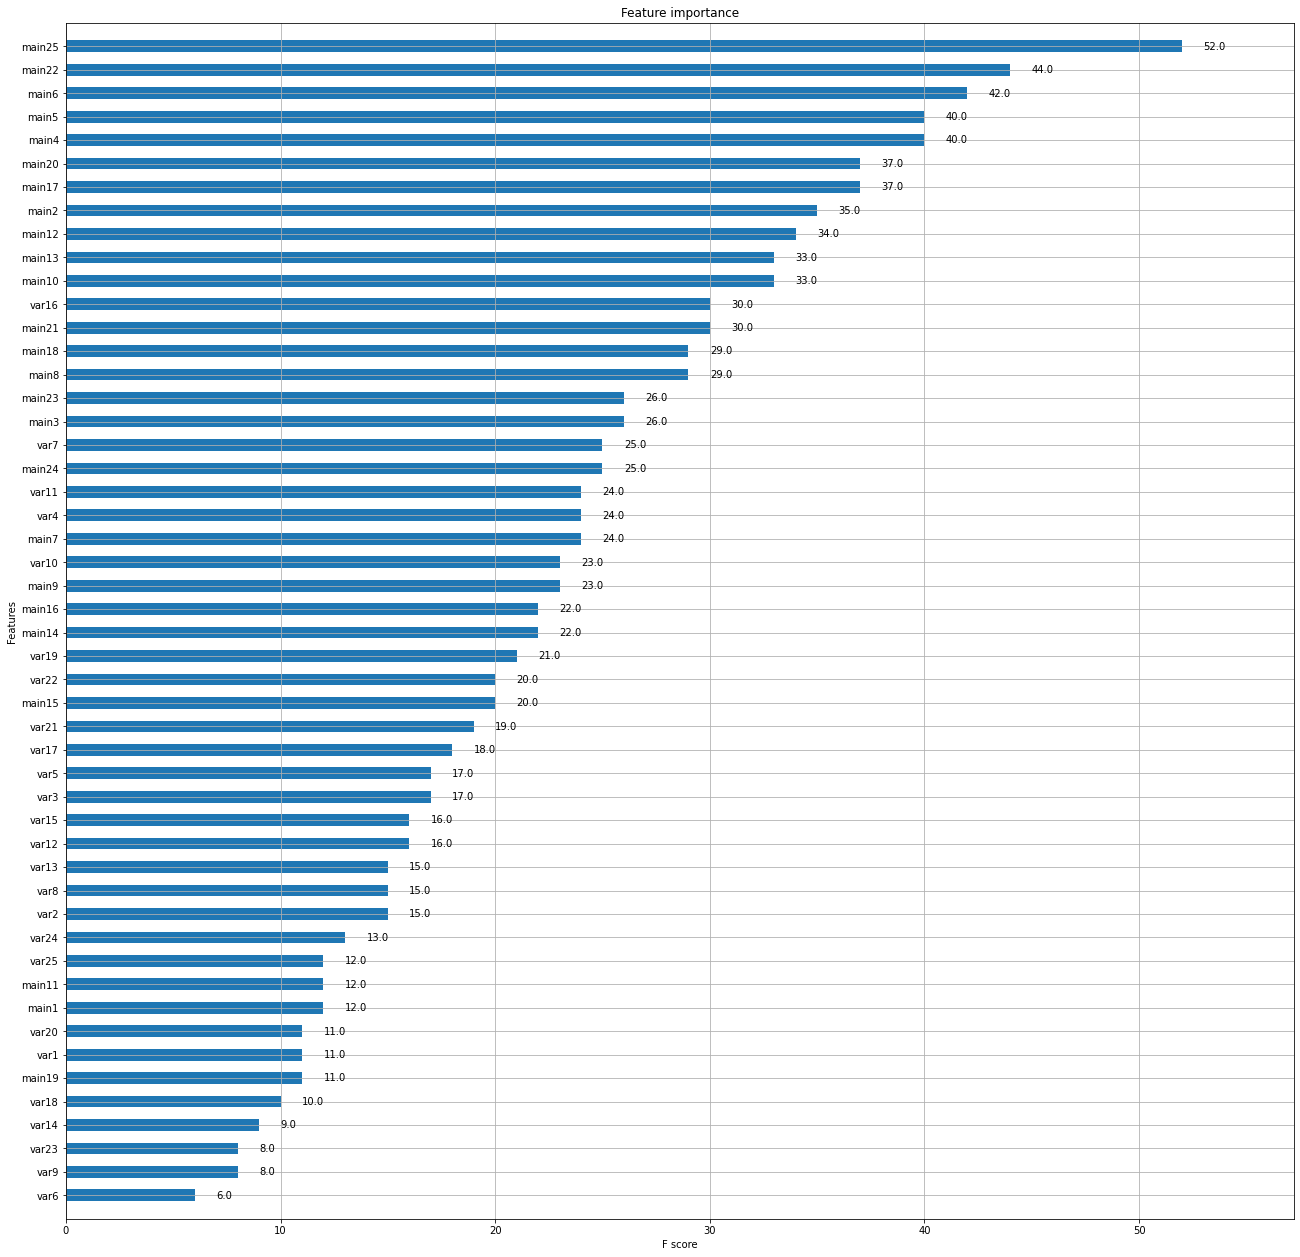

In [353]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(22, 22))

plot_importance(model, ax=ax, height=.5)

# Show the plot
plt.show()


In [452]:
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming df, X, and y are defined before this point

enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=2)

# Define the AFS model
class AFS:
    def __init__(self, num_features, num_classes, hidden_size=16):
        self.num_features = num_features
        self.num_classes = num_classes
        self.hidden_size = hidden_size

        # Define the attention module
        self.attention_module = tf.keras.Sequential([
            tf.keras.layers.Dense(hidden_size, activation='tanh'),
            tf.keras.layers.Dense(1),
        ])

        # Define the learning module
        self.learning_module = tf.keras.Sequential([
            tf.keras.layers.Dense(hidden_size, activation='tanh'),
            tf.keras.layers.Dense(num_classes, activation='softmax'),
        ])

    def select_features(self, X, y):
        # Compute attention weights
        attention_scores = self.attention_module(X)
        attention_weights = tf.nn.softmax(attention_scores, axis=1)
        
        # Select features based on attention weights
        selected_features = X * attention_weights
        # Train the learning module with one-hot encoded labels
        self.learning_module.compile(loss='categorical_crossentropy',optimizer='adam',  metrics=['acc'])
        self.learning_module.fit(selected_features, y, epochs=10)
       # print(self.learning_module.summary())
        # Return the selected features
        return selected_features

# Create an instance of the AFS model
afs = AFS(num_features=X_train.shape[1], num_classes=10)

# # Select features for the training set
selected_features_train = afs.select_features(X_train, Y_train)

# # Select features for the test set
# selected_features_test = afs.select_features(X_test, Y_test)

# # Train a logistic regression model on the selected features
# model = LogisticRegression()
# model.fit(selected_features_train, Y_train)

# # Evaluate the performance of the model on the test set
# predictions = model.predict(selected_features_test)
# accuracy = accuracy_score(Y_test.argmax(axis=1), predictions.argmax(axis=1))
# print("Accuracy:", accuracy)


Epoch 1/10


ValueError: in user code:

    File "c:\Users\justr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\justr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\justr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\justr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\justr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "c:\Users\justr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\justr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\justr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\justr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\justr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 2) and (None, 10) are incompatible


In [453]:
def preprocess_data(X, y):
    enc = OneHotEncoder()
    Y = enc.fit_transform(y[:, np.newaxis]).toarray()

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, Y

def create_afs_model(num_features, num_classes, hidden_size=16):
    attention_module = tf.keras.Sequential([
        tf.keras.layers.Dense(hidden_size, activation='tanh'),
        tf.keras.layers.Dense(1),
    ])

    learning_module = tf.keras.Sequential([
        tf.keras.layers.Dense(hidden_size, activation='tanh'),
        tf.keras.layers.Dense(num_classes, activation='softmax'),
    ])

    return attention_module, learning_module

def select_features(afs_model, X, y):
    attention_scores = afs_model[0](X)
    attention_weights = tf.nn.softmax(attention_scores, axis=1)

    selected_features = X * attention_weights

    afs_model[1].compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    afs_model[1].fit(selected_features, y, epochs=10)

    return selected_features

def main():
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)

    X_train_scaled, Y_train_onehot = preprocess_data(X_train, Y_train)
    X_test_scaled, Y_test_onehot = preprocess_data(X_test, Y_test)

    afs_model = create_afs_model(num_features=X_train.shape[1], num_classes=10)

    selected_features_train = select_features(afs_model, X_train_scaled, Y_train_onehot)
    # Uncomment the following lines if you want to use the model on the test set
    # selected_features_test = select_features(afs_model, X_test_scaled, Y_test_onehot)
    
    # model = LogisticRegression()
    # model.fit(selected_features_train, Y_train)

    # predictions = model.predict(selected_features_test)
    # accuracy = accuracy_score(Y_test.argmax(axis=1), predictions.argmax(axis=1))
    # print("Accuracy:", accuracy)
main()

Epoch 1/10


ValueError: in user code:

    File "c:\Users\justr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\justr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\justr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\justr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\justr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "c:\Users\justr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\justr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\justr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\justr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\justr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 2) and (None, 10) are incompatible


In [ ]:
n_features = X_train.shape[1]
n_classes = Y_train.shape[1]

attn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(2, activation='tanh'),
        tf.keras.layers.Dense(1),
    ])
attn_weights = ts.nx